In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import datetime
import time
from scipy.stats import linregress
from pprint import pprint
from pandas import json_normalize

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#  Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
pprint(cities)

['atuona',
 'bredasdorp',
 'souillac',
 'abiy adi',
 'mormugao',
 'bluff',
 'kapaa',
 'khorramshahr',
 'sentyabrskiy',
 'codrington',
 'east london',
 'hirara',
 'kodiak',
 'busselton',
 'aleksandrovsk-sakhalinskiy',
 'boralday',
 'umm lajj',
 'constitucion',
 'sao domingos',
 'imbituba',
 'ushuaia',
 'punta arenas',
 'saint-philippe',
 'bairiki',
 'hermanus',
 'victoria',
 'port elizabeth',
 'arraial do cabo',
 'cidreira',
 'butaritari',
 'alofi',
 'taolanaro',
 'port hedland',
 'new norfolk',
 'mananjary',
 'grand river south east',
 'martapura',
 'bengkulu',
 'waingapu',
 'port alfred',
 'alyangula',
 'hobart',
 'tuatapere',
 'roma',
 'norman wells',
 'ponta do sol',
 'makakilo city',
 'fortuna',
 'rikitea',
 'katsuura',
 'qaanaaq',
 'axim',
 'seoul',
 'cape town',
 'catuday',
 'launceston',
 'albany',
 'north battleford',
 'lebu',
 'vaini',
 'longyearbyen',
 'rock springs',
 'lastoursville',
 'hilo',
 'loding',
 'yellowknife',
 'ahipara',
 'castro',
 'sukhobezvodnoye',
 'portland',

# Perform API Calls 
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = url +'appid=' + weather_api_key + '&q=' + 'east london' + '&units=' + units
response = requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -33.0153, 'lon': 27.9116},
 'dt': 1652300775,
 'id': 1006984,
 'main': {'feels_like': 61.5,
          'grnd_level': 1014,
          'humidity': 74,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 62.11,
          'temp_max': 62.11,
          'temp_min': 62.11},
 'name': 'East London',
 'sys': {'country': 'ZA', 'sunrise': 1652244530, 'sunset': 1652282443},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 304, 'gust': 10.6, 'speed': 7.74}}


In [5]:
# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# List of city data
city_data = []

# Create counters
i = 0
set_count = 1

# Begin Print process
print(f'Beginning Data Retrieval \n-----------------------------')

# A loop that repeats an api call 
for index, city in enumerate(cities):
    i +=1
    
    query_url = url +'appid=' + weather_api_key +'&q='+ city + '&units=' + units

    response = requests.get(query_url).json()
    print(f'Processing Record {index} of Set {set_count} | {city}')
    if response['cod'] == '404':
          print(f'City not found. Skipping...')
    else:
        city_data.append({
            'City': response['name'],
            'Lat': response['coord']['lat'],
            'Lng': response['coord']['lon'],
            'Max Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Cloudiness': response['clouds']['all'],
            'Wind Speed': response['wind']['speed'],
            'Country': response['sys']['country'],
            'Date': response['dt']
            })  
    
    if i == 49:
        i =0
        set_count +=1
        
print("------------------------------\nData Retrieval Complete\n------------------------------")         

Beginning Data Retrieval 
-----------------------------
Processing Record 0 of Set 1 | atuona
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | abiy adi
City not found. Skipping...
Processing Record 4 of Set 1 | mormugao
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | khorramshahr
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | hirara
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | aleksandrovsk-sakhalinskiy
Processing Record 15 of Set 1 | boralday
Processing Record 16 of Set 1 | umm lajj
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | sao domingos
Processing Record 19 of Set 1 | imbituba
Processing Record 20 of Set 1 | ushuaia
Processi

Processing Record 181 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 182 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 183 of Set 4 | garowe
Processing Record 184 of Set 4 | soure
Processing Record 185 of Set 4 | okhotsk
Processing Record 186 of Set 4 | saint-augustin
Processing Record 187 of Set 4 | thompson
Processing Record 188 of Set 4 | palm springs
Processing Record 189 of Set 4 | sataua
City not found. Skipping...
Processing Record 190 of Set 4 | batemans bay
Processing Record 191 of Set 4 | faya
Processing Record 192 of Set 4 | san quintin
Processing Record 193 of Set 4 | naron
Processing Record 194 of Set 4 | malm
Processing Record 195 of Set 4 | vestmannaeyjar
Processing Record 196 of Set 5 | namibe
Processing Record 197 of Set 5 | luderitz
Processing Record 198 of Set 5 | buenos aires
Processing Record 199 of Set 5 | taburi
City not found. Skipping...
Processing Record 200 of Set 5 | lorengau
Processing Record 201 of Set 5 | bun

Processing Record 365 of Set 8 | guayaramerin
Processing Record 366 of Set 8 | atlantic city
Processing Record 367 of Set 8 | grindavik
Processing Record 368 of Set 8 | taksimo
Processing Record 369 of Set 8 | el faiyum
City not found. Skipping...
Processing Record 370 of Set 8 | half moon bay
Processing Record 371 of Set 8 | fulton
Processing Record 372 of Set 8 | indramayu
Processing Record 373 of Set 8 | hambantota
Processing Record 374 of Set 8 | brinkovskaya
Processing Record 375 of Set 8 | nalut
Processing Record 376 of Set 8 | cap malheureux
Processing Record 377 of Set 8 | xuddur
Processing Record 378 of Set 8 | jatai
Processing Record 379 of Set 8 | mehamn
Processing Record 380 of Set 8 | ramshir
Processing Record 381 of Set 8 | ylivieska
Processing Record 382 of Set 8 | bakchar
Processing Record 383 of Set 8 | kinsale
Processing Record 384 of Set 8 | vangaindrano
Processing Record 385 of Set 8 | abeche
Processing Record 386 of Set 8 | lipin bor
Processing Record 387 of Set 8 

Processing Record 548 of Set 12 | tayu
Processing Record 549 of Set 12 | port augusta
Processing Record 550 of Set 12 | pompeia
Processing Record 551 of Set 12 | asau
Processing Record 552 of Set 12 | miyako
Processing Record 553 of Set 12 | grafton
Processing Record 554 of Set 12 | ambon
Processing Record 555 of Set 12 | jiddah
City not found. Skipping...
Processing Record 556 of Set 12 | galesong
Processing Record 557 of Set 12 | kaihua
Processing Record 558 of Set 12 | akyab
Processing Record 559 of Set 12 | ibra
Processing Record 560 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 561 of Set 12 | totolapan
Processing Record 562 of Set 12 | lyudinovo
Processing Record 563 of Set 12 | mareeba
Processing Record 564 of Set 12 | johi
Processing Record 565 of Set 12 | zupanja
Processing Record 566 of Set 12 | watertown
Processing Record 567 of Set 12 | khandyga
Processing Record 568 of Set 12 | sexsmith
Processing Record 569 of Set 12 | tabriz
Processing Record 570 

# Convert Raw Data to DataFrame

- Display the DataFrame
- Export the city data into a .csv

In [6]:
# Convert DataFrame from "city_data"
city_data_df = pd.DataFrame(city_data)

# Export the City_Data into a csv
#city_data_df.to_csv(output_data_file, index_label="City_ID")

# Preview DataFrame
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.78,69,0,18.21,PF,1652300775
1,Bredasdorp,-34.5322,20.0403,54.37,84,0,4.34,ZA,1652300775
2,Souillac,-20.5167,57.5167,75.58,88,40,1.14,MU,1652300775
3,Mormugao,15.4000,73.8000,82.02,80,100,7.87,IN,1652300775
4,Bluff,-46.6000,168.3333,51.80,79,17,17.29,NZ,1652300775
...,...,...,...,...,...,...,...,...,...
555,Philadelphia,39.9523,-75.1638,71.51,55,100,9.22,US,1652300855
556,Arrondissement de Lannion,48.7500,-3.4167,55.15,79,40,9.22,FR,1652300855
557,Kalmar,56.6616,16.3616,52.97,91,99,3.00,SE,1652300751
558,Saint-Pierre,-21.3393,55.4781,74.88,73,100,4.61,RE,1652300855


In [7]:
# Creates variables for relevant table columns

lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Inspect the data and remove the cities where the humidity > 100%.

In [8]:
city_data_df.sort_values(by = ['Humidity'], ascending = False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
461,Odda,60.0691,6.5457,49.77,100,100,7.38,NO,1652300843
544,Karasjok,69.4719,25.5112,35.92,100,100,4.07,NO,1652300853
32,Martapura,-3.4167,114.8500,77.09,100,100,3.44,ID,1652300783
214,Nemuro,43.3236,145.5750,44.89,100,100,10.76,JP,1652300811
218,Gravdal,68.1214,13.5031,42.69,100,40,2.30,NO,1652300812
...,...,...,...,...,...,...,...,...,...
229,Taoudenni,22.6783,-3.9836,96.94,7,0,4.41,ML,1652300814
553,Kidal,18.4411,1.4078,93.87,6,0,8.52,ML,1652300854
537,Tombouctou,20.0000,-3.0000,91.76,5,0,8.57,ML,1652300853
408,Tessalit,20.1986,1.0114,90.66,5,0,10.42,ML,1652300837


### Data Analysis 
- Analysis shows no cities result in humidity greater than 100%

# Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

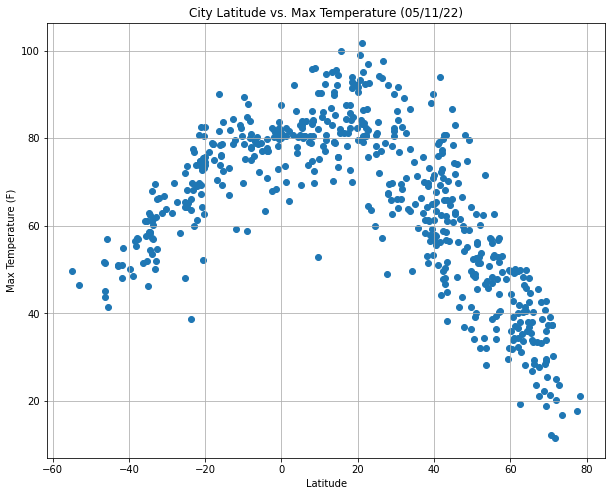

In [41]:
# Establish size 
plt.figure(figsize=(10,8))

# Establishes type, data, and configuration 
plt.scatter(lat, max_temp, linewidths=1, marker="o")

# Creates labels and grid for graph
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Exports graph as a png image file
plt.savefig('Picture1.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of City Latitude vs. Max Temperature plot 
- The relationship between **city latitude and maximum temperature** shows a strong non-linear curved scatter plot with cities closer to the equator reaching higher maximum temperatures in comparison to cities further from the equator reaching lower maximum temperatures. 

- These results are expected since cities closer to the equator receive hotter climates with little seasonal change, in comparison to cities further away from the equator which receive lower climates with more seasonal change. 

# Latitude vs. Humidity Plot

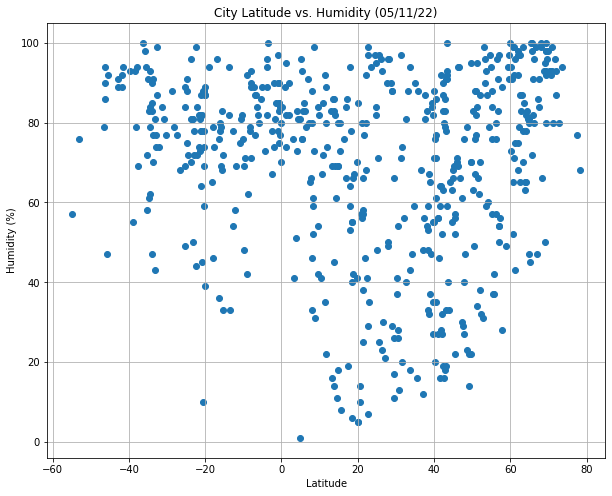

In [42]:
# Establish size 
plt.figure(figsize=(10,8))
           
# Establishes type, data, and configuration 
plt.scatter(lat, humidity, linewidths=1, marker="o")
           
# Creates labels and grid for graph
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Exports graph as a png image file
plt.savefig('Picture2.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Latitude vs. Humidity Plot
- The relationship between **city latitude and humidity** shows a negative correlation throughout this scatter plot as it appears humidity varies across the northern and southern hemisphere. 

- These results prove cities vary in humidity no matter the position of city. 

# Latitude vs. Cloudiness Plot

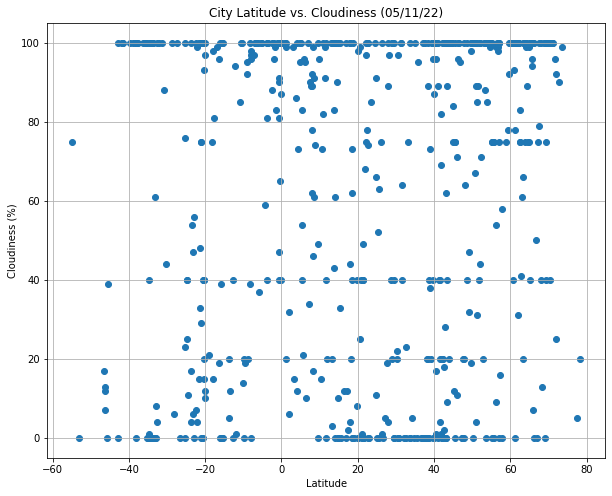

In [43]:
# Establish size 
plt.figure(figsize=(10,8))

# Establishes type, data, and configuration
plt.scatter(lat, cloudiness, linewidths=1, marker="o")

# Creates labels and grid for graph
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Exports graph as a png image file
plt.savefig('Picture3.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Latitude vs. Humidity Plot
- The relationship between **city latitude and cloudiness** shows no relationship as the scatter plot is almost equally distributing the results of cloudiness no matter the position of city in relationship to the equator. 

- This means a city located in southern hemisphere could have low or high cloudiness levels, the same results seem to appear for a city located in northern hemisphere. 


# Latitude vs. Wind Speed Plot

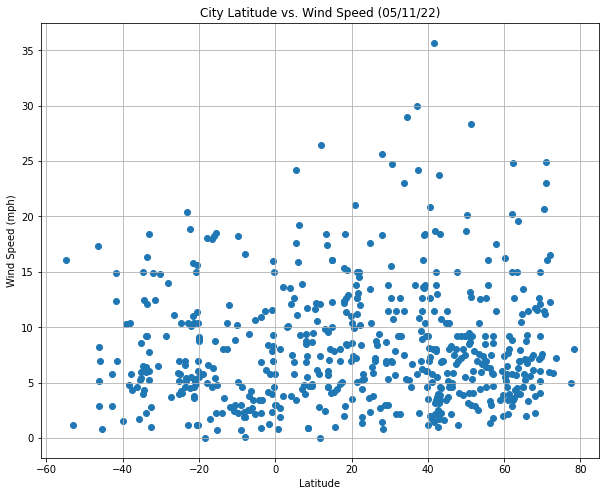

In [44]:
# Establish size 
plt.figure(figsize=(10,8))

# Establishes type, data, and configuration
plt.scatter(lat, wind_speed, linewidths=1, marker="o")

# Creates labels and grid for graph
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Exports graph as a png image file
plt.savefig('Picture4.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Latitude vs. Humidity Plot
- The relationship between **city latitude and wind speed** shows a moderate relationship which starts from the right and proceeds to show more gaps within the data as the plot goes towards the left. 

- This means cities located in the highest and lowest point of the equator seem to have higher wind speeds with an equal distribution throughout the rest of the equator. 


# Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames

nothern = city_data_df.loc[city_data_df["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = city_data_df.loc[city_data_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [35]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)

## Northern Hemisphere - Max Temp vs. Latitude 

The r-squared is: -0.8445840756528266


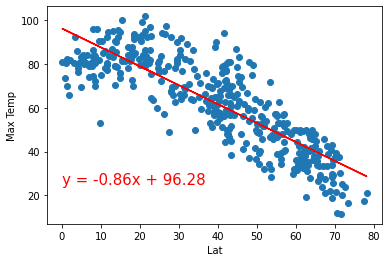

In [45]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)

# Exports graph as a png image file
plt.savefig('Picture5.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Northern Hempisphere - Max Temp vs. Latitude

- The relationship between **northern hemisphere maximum temperature and latitude** shows a positive relationship with a high r-squared equation. 
- The linear regression also shows a higher temperature in countries closer to the equator whilst temperature appears to drop as countries get further away from the equator, as expected. 

## Southern Hemisphere - Max Temp vs. Latitude 

The r-squared is: 0.8068003545291731


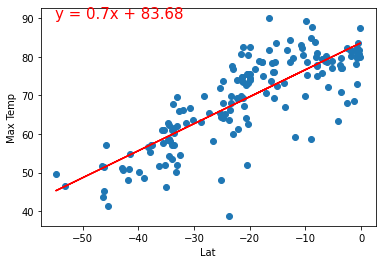

In [46]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

# Exports graph as a png image file
plt.savefig('Picture6.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Southern Hempisphere - Max Temp vs. Latitude

- The relationship between **southern hemisphere maximum temperature and latitude** shows a positive relationship with a high r-squared equation. 

- The linear regression also shows lower temperatures in countries further away from the equator whilst temperature appears to rise as countries get closer to the equator, as expected. 


## Northern Hemisphere - Humidity (%) vs. Latitude 

The r-squared is: 0.2285511922723867


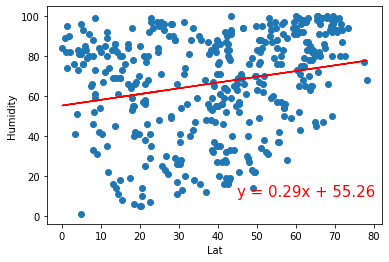

In [47]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

# Exports graph as a png image file
plt.savefig('Picture7.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Northern Hempisphere - Humidity (%) vs. Latitude

- The relationship between **northern hemisphere humidity and latitude** depicts a negative relationship based on r-squared equation. 

- Data appears to cluster more above trend line with more gaps appearing below trendline. 

- This shows humidity varies to some degree no matter the position of the equator, however cities located further from the equator appear to have higher humidity levels.

## Southern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: -0.008354320887197474


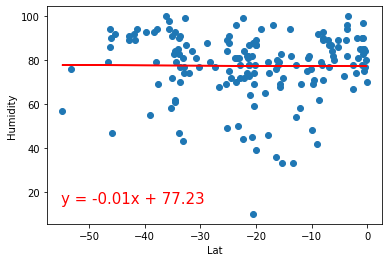

In [48]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

# Exports graph as a png image file
plt.savefig('Picture8.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Southern Hempisphere - Humidity (%) vs. Latitude

- The relationship between **southern hemisphere humidity and latitude** depicts a negative relationship based on r-squared equation. 

- Data appears to cluster more above trend line in top right with more gaps appearing throughout the rest of the graph. 

- This shows cities located closer to the equator have higher humidity and decrease as it gets further away from the equator. 

## Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.17699867122146795


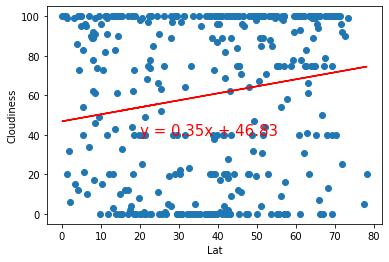

In [49]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)

# Exports graph as a png image file
plt.savefig('Picture9.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Northern Hempisphere - Cloudiness (%) vs. Latitude

- The relationship between **northern hemisphere cloudiness and latitude** depicts a positive relationship based on r-squared equation. 

- Data appears to cluster equally above and below trend line with more gaps around the trendline. 

- This shows an equal distribution in cloudiness. 

## Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.23232916119828684


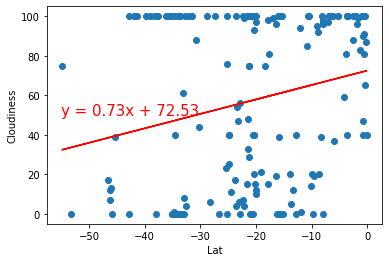

In [50]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

# Exports graph as a png image file
plt.savefig('Picture10.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Southern Hempisphere - Cloudiness (%) vs. Latitude

- The relationship between **southern hemisphere cloudiness and latitude** depicts a negative relationship based on r-squared equation. 

- Data appears to cluster more in top right above trend line with more gaps appearing towards the left of the graph. 

- This shows higher levels of cloudiness closer to the equator. 

## Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: -0.03143632764770137


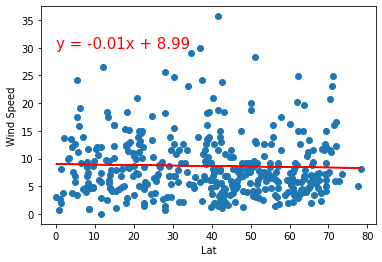

In [51]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)

# Exports graph as a png image file
plt.savefig('Picture11.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Northern Hempisphere - Wind Speed (mph) vs. Latitude

- The relationship between **northern hemisphere wind speed and latitude** depicts a negative relationship based on r-squared equation. 

- Data appears to cluster below trend line with more gaps appearing above. 

- This shows varied levels of wind speed distributed throughout the graph. 

## Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: -0.12171402546987845


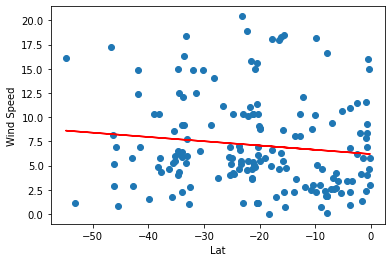

In [52]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)

# Exports graph as a png image file
plt.savefig('Picture12.png', dpi=100, bbox_inches='tight')

# Display plot
plt.show()

### Data analysis of Southern Hempisphere - Wind Speed (mph) vs. Latitude

- The relationship between **southern hemisphere wind speed and latitude** depicts a positive relationship based on r-squared equation. 

- Data appears to cluster below trend line towards bottom right with more gaps appearing throughout. 

- This shows wind speed increase further away from the equator. 